In [1]:
# default_exp data.m5

In [2]:
# hide
import sys

sys.path.append("..")
import pandas as pd

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# hide
from nbdev.showdoc import *

# Data M5

> Getting the M5 data into a timerelevant dataloader.



In [4]:
# export
from fastseq.data.load import *
from fastseq.core import *
from fastcore.all import *
from fastcore.imports import *
from fastai2.basics import *
from fastai2.data.transforms import *
from fastai2.tabular.core import *
from fastseq.data.load_pd import *

In [5]:
path = Path('../data/m5_tiny')
path.ls()

(#6) [Path('../data/m5_tiny/sales_train_validation.csv'),Path('../data/m5_tiny/sample_submission.csv'),Path('../data/m5_tiny/calendar.csv'),Path('../data/m5_tiny/prices.csv'),Path('../data/m5_tiny/calender_d.csv'),Path('../data/m5_tiny/sell_prices.csv')]

In [6]:
df_sales = pd.read_csv(path / 'sales_train_validation.csv',)
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [25]:
# export
def add_days(df_sales, days = 28*2, fill = -1):
    for i in range(days):
        df_sales['d_'+str(i+1914)] = fill
    return df_sales

In [7]:
add_days(df_sales).head() 

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [8]:
df_cal = pd.read_csv(path / 'calendar.csv')
df_cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
df_cal = df_cal[[c for c in list(df_cal.columns) if ('event' not in c)]]
df_cal.index = df_cal['d']
df_cal = df_cal.T
df_cal

d,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
date,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19
wm_yr_wk,11101,11101,11101,11101,11101,11101,11101,11102,11102,11102,...,11619,11620,11620,11620,11620,11620,11620,11620,11621,11621
weekday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,...,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
wday,1,2,3,4,5,6,7,1,2,3,...,7,1,2,3,4,5,6,7,1,2
month,1,1,1,2,2,2,2,2,2,2,...,6,6,6,6,6,6,6,6,6,6
year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
d,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
snap_CA,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
snap_TX,0,0,0,1,0,1,0,1,1,1,...,0,1,1,1,0,1,0,0,0,0
snap_WI,0,0,0,0,1,1,0,1,1,0,...,0,1,1,0,1,1,0,0,0,0


In [10]:
df_cal.T.to_csv(path / 'calender_d.csv')

## price data

In [11]:
df_price = pd.read_csv(path / 'sell_prices.csv')
df_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [12]:
# export
@delegates(pd.Series.interpolate)
def interpolate_w_starting_nan(s, **kwargs):
    if s.iloc[0] != s.iloc[0]:
        for i,o in enumerate(s != s):
            if not o:
                s.iloc[0] = s.iloc[i]
                break
    return s.interpolate(**kwargs)

In [13]:
s = pd.Series([np.nan,np.nan,np.nan, 0, 2, np.nan, 6])
s = interpolate_w_starting_nan(s)
test_eq((s!=s).sum(),0)
s = pd.Series([np.nan,np.nan,np.nan, 0, 1, np.nan, 3], index = ['d'+str(i) for i in range(7)])
s = interpolate_w_starting_nan(s)
test_eq((s!=s).sum(),0)
s

d0    0.0
d1    0.0
d2    0.0
d3    0.0
d4    1.0
d5    2.0
d6    3.0
dtype: float64

In [14]:
df_cal = pd.read_csv(path / 'calender_d.csv')
df_cal.index = df_cal['d']
d2wk = dict(df_cal.T.loc['wm_yr_wk',:])
del df_cal
pd.Series(d2wk)

d_1       11101
d_2       11101
d_3       11101
d_4       11101
d_5       11101
          ...  
d_1965    11620
d_1966    11620
d_1967    11620
d_1968    11621
d_1969    11621
Length: 1969, dtype: int64

In [15]:
# export
def get_prices(df_price, store_id, item_id, method = 'linear'):    
    _df = df_price[df_price['store_id'] == store_id]
    _df = _df[_df['item_id'] == item_id]
    _df['wm_yr_wk'] = _df['wm_yr_wk'].astype(int)
    _df.index = _df['wm_yr_wk']
    p = dict(_df['sell_price'])
    wm_yr_wk = pd.Series({i:p[i] if i in p else np.nan for i in range(11100,11622)})
    wm_yr_wk = interpolate_w_starting_nan(wm_yr_wk, method = method)
    return wm_yr_wk

In [15]:
p = get_prices(df_price, 'CA_1', 'HOBBIES_1_001')
p

11100    9.58
11101    9.58
11102    9.58
11103    9.58
11104    9.58
         ... 
11617    8.38
11618    8.38
11619    8.38
11620    8.38
11621    8.38
Length: 522, dtype: float64

In [16]:
l = L()
for i in range(1,1970):
    l.append(p[d2wk['d_'+str(i)]])    
pd.Series(l)

0       9.58
1       9.58
2       9.58
3       9.58
4       9.58
        ... 
1964    8.38
1965    8.38
1966    8.38
1967    8.38
1968    8.38
Length: 1969, dtype: float64

In [17]:
# export
def _get_price_s(row):
    p = get_prices(df_price, row['store_id'], row['item_id'])
    dct = {'store_id':row['store_id'],'item_id':row['item_id']}
    for i in range(1,1970):
        dct['d_'+str(i)] = p[d2wk['d_'+str(i)]]   
    return dct

In [17]:
rows = [row for i,row in df_sales.iterrows()]
print(f"Estimated duration: {len(rows)*.5}")

Estimated duration: 113.0


In [18]:
%%time
import os
if not os.path.isfile(path / 'prices.csv'):
    from multiprocessing.dummy import Pool as ThreadPool
    pool = ThreadPool(10)
    prices = pool.map(_get_price_s, rows)
    prices = pd.DataFrame(prices)
    prices.to_csv(path / 'prices.csv',index=False)
prices = pd.read_csv(path / 'prices.csv')
prices.head()

CPU times: user 172 ms, sys: 3.97 ms, total: 176 ms
Wall time: 179 ms


,store_id,item_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,CA_1,HOBBIES_1_001,9.58,9.58,9.58,9.58,9.58,9.58,9.58,9.58,...,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38
1,CA_1,HOBBIES_1_002,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,...,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97
2,CA_1,HOBBIES_1_003,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97,...,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97
3,CA_1,HOBBIES_1_004,4.34,4.34,4.34,4.34,4.34,4.34,4.34,4.34,...,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64
4,CA_1,HOBBIES_1_005,2.98,2.98,2.98,2.98,2.98,2.98,2.98,2.98,...,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88


## M5

In [19]:
df_cal = pd.read_csv(path / 'calender_d.csv')
df_cal.index = df_cal['d']
del df_cal['d']
df_cal

,date,wm_yr_wk,weekday,wday,month,year,d.1,snap_CA,snap_TX,snap_WI
d,,,,,,,,,,
d_1,2011-01-29,11101,Saturday,1,1,2011,d_1,0,0,0
d_2,2011-01-30,11101,Sunday,2,1,2011,d_2,0,0,0
d_3,2011-01-31,11101,Monday,3,1,2011,d_3,0,0,0
d_4,2011-02-01,11101,Tuesday,4,2,2011,d_4,1,1,0
d_5,2011-02-02,11101,Wednesday,5,2,2011,d_5,1,0,1
...,...,...,...,...,...,...,...,...,...,...
d_1965,2016-06-15,11620,Wednesday,5,6,2016,d_1965,0,1,1
d_1966,2016-06-16,11620,Thursday,6,6,2016,d_1966,0,0,0
d_1967,2016-06-17,11620,Friday,7,6,2016,d_1967,0,0,0


In [20]:
df_sales = to_contained_series(pd.read_csv(path / 'sales_train_validation.csv'), s_slice = None)
for c in df_cal.columns:
    df_sales[c] = pd.Series([df_cal[c]])
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales,date,wm_yr_wk,weekday,wday,month,year,d.1,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64","d d_1 2011-01-29 d_2 2011-01-30 d_3 2011-01-31 d_4 2011-02-01 d_5 2011-02-02 ... d_1965 2016-06-15 d_1966 2016-06-16 d_1967 2016-06-17 d_1968 2016-06-18 d_1969 2016-06-19 Name: date, Length: 1969, dtype: object","d d_1 11101 d_2 11101 d_3 11101 d_4 11101 d_5 11101 ... d_1965 11620 d_1966 11620 d_1967 11620 d_1968 11621 d_1969 11621 Name: wm_yr_wk, Length: 1969, dtype: int64","d d_1 Saturday d_2 Sunday d_3 Monday d_4 Tuesday d_5 Wednesday ... d_1965 Wednesday d_1966 Thursday d_1967 Friday d_1968 Saturday d_1969 Sunday Name: weekday, Length: 1969, dtype: object","d d_1 1 d_2 2 d_3 3 d_4 4 d_5 5 .. d_1965 5 d_1966 6 d_1967 7 d_1968 1 d_1969 2 Name: wday, Length: 1969, dtype: int64","d d_1 1 d_2 1 d_3 1 d_4 2 d_5 2 .. d_1965 6 d_1966 6 d_1967 6 d_1968 6 d_1969 6 Name: month, Length: 1969, dtype: int64","d d_1 2011 d_2 2011 d_3 2011 d_4 2011 d_5 2011 ... d_1965 2016 d_1966 2016 d_1967 2016 d_1968 2016 d_1969 2016 Name: year, Length: 1969, dtype: int64","d d_1 d_1 d_2 d_2 d_3 d_3 d_4 d_4 d_5 d_5 ... d_1965 d_1965 d_1966 d_1966 d_1967 d_1967 d_1968 d_1968 d_1969 d_1969 Name: d.1, Length: 1969, dtype: object","d d_1 0 d_2 0 d_3 0 d_4 1 d_5 1 .. d_1965 0 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_CA, Length: 1969, dtype: int64","d d_1 0 d_2 0 d_3 0 d_4 1 d_5 0 .. d_1965 1 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_TX, Length: 1969, dtype: int64","d d_1 0 d_2 0 d_3 0 d_4 0 d_5 1 .. d_1965 1 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_WI, Length: 1969, dtype: int64"
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
prices = pd.read_csv(path / 'prices.csv')
prices = to_contained_series(prices, series_column_name = 'prices', s_slice = slice(2,None),add_zeros = 0)
prices

,store_id,item_id,prices
0,CA_1,HOBBIES_1_001,"0 9.58 1 9.58 2 9.58 3 9.58 4 9.58 ... 1964 8.38 1965 8.38 1966 8.38 1967 8.38 1968 8.38 Length: 1969, dtype: float64"
1,CA_1,HOBBIES_1_002,"0 3.97 1 3.97 2 3.97 3 3.97 4 3.97 ... 1964 3.97 1965 3.97 1966 3.97 1967 3.97 1968 3.97 Length: 1969, dtype: float64"
2,CA_1,HOBBIES_1_003,"0 2.97 1 2.97 2 2.97 3 2.97 4 2.97 ... 1964 2.97 1965 2.97 1966 2.97 1967 2.97 1968 2.97 Length: 1969, dtype: float64"
3,CA_1,HOBBIES_1_004,"0 4.34 1 4.34 2 4.34 3 4.34 4 4.34 ... 1964 4.64 1965 4.64 1966 4.64 1967 4.64 1968 4.64 Length: 1969, dtype: float64"
4,CA_1,HOBBIES_1_005,"0 2.98 1 2.98 2 2.98 3 2.98 4 2.98 ... 1964 2.88 1965 2.88 1966 2.88 1967 2.88 1968 2.88 Length: 1969, dtype: float64"
...,...,...,...
221,WI_3,FOODS_3_823,"0 2.50 1 2.50 2 2.50 3 2.50 4 2.50 ... 1964 2.98 1965 2.98 1966 2.98 1967 2.98 1968 2.98 Length: 1969, dtype: float64"
222,WI_3,FOODS_3_824,"0 2.47 1 2.47 2 2.47 3 2.47 4 2.47 ... 1964 2.48 1965 2.48 1966 2.48 1967 2.48 1968 2.48 Length: 1969, dtype: float64"
223,WI_3,FOODS_3_825,"0 4.00 1 4.00 2 4.00 3 4.00 4 4.00 ... 1964 3.98 1965 3.98 1966 3.98 1967 3.98 1968 3.98 Length: 1969, dtype: float64"
224,WI_3,FOODS_3_826,"0 1.28 1 1.28 2 1.28 3 1.28 4 1.28 ... 1964 1.28 1965 1.28 1966 1.28 1967 1.28 1968 1.28 Length: 1969, dtype: float64"


In [23]:
df_sales = df_sales.merge(prices, on = ['store_id','item_id']) 
df_sales.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,sales,date,wm_yr_wk,weekday,wday,month,year,d.1,snap_CA,snap_TX,snap_WI,prices_x,prices_y
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64","d d_1 2011-01-29 d_2 2011-01-30 d_3 2011-01-31 d_4 2011-02-01 d_5 2011-02-02 ... d_1965 2016-06-15 d_1966 2016-06-16 d_1967 2016-06-17 d_1968 2016-06-18 d_1969 2016-06-19 Name: date, Length: 1969, dtype: object","d d_1 11101 d_2 11101 d_3 11101 d_4 11101 d_5 11101 ... d_1965 11620 d_1966 11620 d_1967 11620 d_1968 11621 d_1969 11621 Name: wm_yr_wk, Length: 1969, dtype: int64","d d_1 Saturday d_2 Sunday d_3 Monday d_4 Tuesday d_5 Wednesday ... d_1965 Wednesday d_1966 Thursday d_1967 Friday d_1968 Saturday d_1969 Sunday Name: weekday, Length: 1969, dtype: object","d d_1 1 d_2 2 d_3 3 d_4 4 d_5 5 .. d_1965 5 d_1966 6 d_1967 7 d_1968 1 d_1969 2 Name: wday, Length: 1969, dtype: int64","d d_1 1 d_2 1 d_3 1 d_4 2 d_5 2 .. d_1965 6 d_1966 6 d_1967 6 d_1968 6 d_1969 6 Name: month, Length: 1969, dtype: int64","d d_1 2011 d_2 2011 d_3 2011 d_4 2011 d_5 2011 ... d_1965 2016 d_1966 2016 d_1967 2016 d_1968 2016 d_1969 2016 Name: year, Length: 1969, dtype: int64","d d_1 d_1 d_2 d_2 d_3 d_3 d_4 d_4 d_5 d_5 ... d_1965 d_1965 d_1966 d_1966 d_1967 d_1967 d_1968 d_1968 d_1969 d_1969 Name: d.1, Length: 1969, dtype: object","d d_1 0 d_2 0 d_3 0 d_4 1 d_5 1 .. d_1965 0 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_CA, Length: 1969, dtype: int64","d d_1 0 d_2 0 d_3 0 d_4 1 d_5 0 .. d_1965 1 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_TX, Length: 1969, dtype: int64","d d_1 0 d_2 0 d_3 0 d_4 0 d_5 1 .. d_1965 1 d_1966 0 d_1967 0 d_1968 0 d_1969 0 Name: snap_WI, Length: 1969, dtype: int64","0 9.58 1 9.58 2 9.58 3 9.58 4 9.58 ... 1964 8.38 1965 8.38 1966 8.38 1967 8.38 1968 8.38 Length: 1969, dtype: float64","0 9.58 1 9.58 2 9.58 3 9.58 4 9.58 ... 1964 8.38 1965 8.38 1966 8.38 1967 8.38 1968 8.38 Length: 1969, dtype: float64"
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 1964 0.0 1965 0.0 1966 0.0 1967 0.0 1968 0.0 Length: 1969, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0 3.97 1 3.97 2 3.97 3 3.97 4 3.97 ... 1964 3.97 1965 3.97 1966 3.97 1967 3.97 1968 3.97 Length: 1969, dtype: float64","0 3.97 1 3.97 2 3.97 3 3.97 4 3.97 ... 1964 3.97 1965 3.97 1966 3.97 1967 3.97 1968 3.97 Length: 1969, dtype: float64"


# M5 Example

In [98]:
path = Path('../data/m5_tiny')
path.ls()

(#6) [Path('../data/m5_tiny/sales_train_validation.csv'),Path('../data/m5_tiny/sample_submission.csv'),Path('../data/m5_tiny/calendar.csv'),Path('../data/m5_tiny/prices.csv'),Path('../data/m5_tiny/calender_d.csv'),Path('../data/m5_tiny/sell_prices.csv')]

In [64]:
df_cal = pd.read_csv(path / 'calendar.csv')
df_cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [65]:
df_cal[[c for c in df_cal if 'event' not in c]]

,date,wm_yr_wk,weekday,wday,month,year,d,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,0,0,0


In [66]:
df_sales = pd.read_csv(path / 'sales_train_validation.csv',).iloc[:100,:]

In [67]:
# export
def _to_series(df, s_slice=None, add_zeros = 28*2):
    s_slice = ifnone(s_slice, slice(6,None))
    r = []
    for i in range(df.shape[0]):
        r.append(pd.Series(np.concatenate([df.iloc[i, s_slice].values.astype(float),[0]*add_zeros]) ))
    return r

@delegates(_to_series)
def to_contained_series(df, series_column_name = 'sales', **kwargs):    
    data={k:v for k,v in dict(df).items() if ('d_' not in k and 'F' not in k)}
    data[series_column_name] = pd.Series(_to_series(df, **kwargs))
    df = pd.DataFrame(data=data)
    return df

In [68]:
df_sales_s = to_contained_series(df_sales)

In [69]:
df_validation = to_contained_series(pd.read_csv(path / 'sample_submission.csv'),
                                    s_slice=slice(1,None), add_zeros = 0) 
df_validation.head()

,id,sales
0,HOBBIES_1_001_CA_1_validation,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5 0.0 6 0.0 7 0.0 8 0.0 9 0.0 10 0.0 11 0.0 12 0.0 13 0.0 14 0.0 15 0.0 16 0.0 17 0.0 18 0.0 19 0.0 20 0.0 21 0.0 22 0.0 23 0.0 24 0.0 25 0.0 26 0.0 27 0.0 dtype: float64
1,HOBBIES_1_002_CA_1_validation,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5 0.0 6 0.0 7 0.0 8 0.0 9 0.0 10 0.0 11 0.0 12 0.0 13 0.0 14 0.0 15 0.0 16 0.0 17 0.0 18 0.0 19 0.0 20 0.0 21 0.0 22 0.0 23 0.0 24 0.0 25 0.0 26 0.0 27 0.0 dtype: float64
2,HOBBIES_1_003_CA_1_validation,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5 0.0 6 0.0 7 0.0 8 0.0 9 0.0 10 0.0 11 0.0 12 0.0 13 0.0 14 0.0 15 0.0 16 0.0 17 0.0 18 0.0 19 0.0 20 0.0 21 0.0 22 0.0 23 0.0 24 0.0 25 0.0 26 0.0 27 0.0 dtype: float64
3,HOBBIES_1_004_CA_1_validation,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5 0.0 6 0.0 7 0.0 8 0.0 9 0.0 10 0.0 11 0.0 12 0.0 13 0.0 14 0.0 15 0.0 16 0.0 17 0.0 18 0.0 19 0.0 20 0.0 21 0.0 22 0.0 23 0.0 24 0.0 25 0.0 26 0.0 27 0.0 dtype: float64
4,HOBBIES_1_005_CA_1_validation,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5 0.0 6 0.0 7 0.0 8 0.0 9 0.0 10 0.0 11 0.0 12 0.0 13 0.0 14 0.0 15 0.0 16 0.0 17 0.0 18 0.0 19 0.0 20 0.0 21 0.0 22 0.0 23 0.0 24 0.0 25 0.0 26 0.0 27 0.0 dtype: float64


In [70]:
lookback, horizon = 28*2, 28
def _id(row):
    return '_'.join(str(row['id']).split('_')[:-1])

df_sales_s_last = to_contained_series(pd.read_csv(path / 'sales_train_validation.csv'),
                                    s_slice=slice(-lookback,None), add_zeros = 28*2)  
df_sales_s_last['sales'] = pd.Series(np.concatenate([df_sales_s_last['sales'].values,[0]*28]))
df_sales_s_last['sales'] = pd.Series(np.concatenate([df_sales_s_last['sales'].values,[0]*28]))
df_sales_s_last.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 2.0 2 0.0 3 1.0 4 1.0 ... 107 0.0 108 0.0 109 0.0 110 0.0 111 0.0 Length: 112, dtype: float64"
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 1.0 4 0.0 ... 107 0.0 108 0.0 109 0.0 110 0.0 111 0.0 Length: 112, dtype: float64"
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... 107 0.0 108 0.0 109 0.0 110 0.0 111 0.0 Length: 112, dtype: float64"
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,"0 0.0 1 0.0 2 0.0 3 1.0 4 0.0 ... 107 0.0 108 0.0 109 0.0 110 0.0 111 0.0 Length: 112, dtype: float64"
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,"0 1.0 1 2.0 2 1.0 3 0.0 4 0.0 ... 107 0.0 108 0.0 109 0.0 110 0.0 111 0.0 Length: 112, dtype: float64"


In [71]:
for i,row in df_validation.iterrows():
    id = '_'.join(str(row['id']).split('_')[:-1])
    c_row = df_sales_s[df_sales]
    break

ValueError: Boolean array expected for the condition, not object

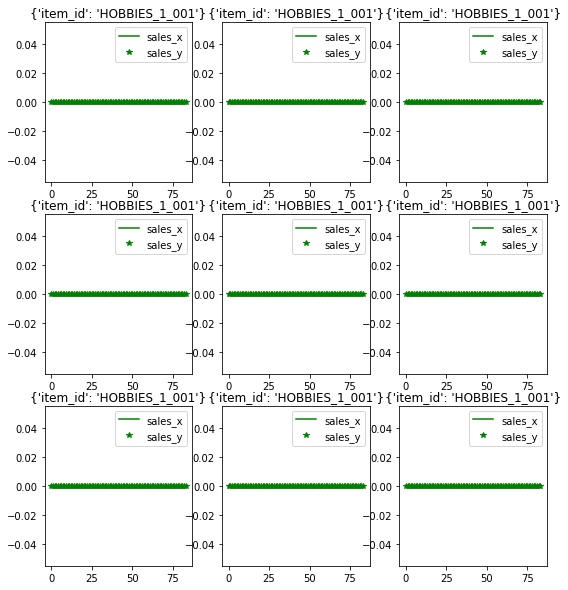

In [72]:
dl =  DfDataLoader(df_sales_s.loc[:,['sales','item_id']], 'sales', horizon = 28, lookback=28*2, step=7)
dl.show_batch(max_n=9)

In [ ]:
# hide
from nbdev.export import *

notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 020_data.load_pd.ipynb.
Converted 02_data.load.ipynb.
Converted 030_data.core_pd.ipynb.
Converted 030_data.m5.ipynb.
